In [3]:
import csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import seaborn as sns
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [4]:
city_day = pd.read_csv('city_day.csv')
del city_day['Unnamed: 0']
city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,Moderate
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,Moderate
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,Moderate
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,Moderate
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


In [5]:
city_day.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
city_day = city_day.copy(deep=True)

mice_imputer = IterativeImputer()
city_day['PM2.5'] = mice_imputer.fit_transform(city_day[['PM2.5']])
city_day['PM10'] = mice_imputer.fit_transform(city_day[['PM10']])
city_day['NO'] = mice_imputer.fit_transform(city_day[['NO']])
city_day['NOx'] = mice_imputer.fit_transform(city_day[['NOx']])
city_day['NH3'] = mice_imputer.fit_transform(city_day[['NH3']])
city_day['CO'] = mice_imputer.fit_transform(city_day[['CO']])
city_day['SO2'] = mice_imputer.fit_transform(city_day[['SO2']])
city_day['O3'] = mice_imputer.fit_transform(city_day[['O3']])
city_day['Benzene'] = mice_imputer.fit_transform(city_day[['Benzene']])
city_day['Toluene'] = mice_imputer.fit_transform(city_day[['Toluene']])
city_day['Xylene'] = mice_imputer.fit_transform(city_day[['Xylene']])
city_day['AQI'] = mice_imputer.fit_transform(city_day[['AQI']])
city_day['NO2'] = mice_imputer.fit_transform(city_day[['NO2']])

In [7]:
city_day.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [8]:
city_day['AQI_Bucket'] = np.where(
   (city_day['AQI'] <=50) & (city_day['AQI'] >=0) ,'Good' , city_day['AQI_Bucket']
   )
city_day['AQI_Bucket'] = np.where(
   (city_day['AQI'] <=100) & (city_day['AQI'] >=51) ,'Satisfactory' , city_day['AQI_Bucket']
   )
city_day['AQI_Bucket'] = np.where(
   (city_day['AQI'] <=200) & (city_day['AQI'] >=101) ,'Moderate' , city_day['AQI_Bucket']
   )
city_day['AQI_Bucket'] = np.where(
   (city_day['AQI'] <=300) & (city_day['AQI'] >=201) ,'Poor' , city_day['AQI_Bucket']
   )
city_day['AQI_Bucket'] = np.where(
   (city_day['AQI'] <=400) & (city_day['AQI'] >=301) ,'Very Poor' , city_day['AQI_Bucket']
   )
city_day['AQI_Bucket'] = np.where(
   (city_day['AQI'] <=500) & (city_day['AQI'] >=401) ,'Severe' , city_day['AQI_Bucket']
   )
city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,Moderate
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,Moderate
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,Moderate
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,Moderate
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


In [9]:
city_day.to_csv('city_day.csv')

In [10]:
def mergeColumns(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['BTX'] = data['Benzene'] + data['Toluene'] + data['Xylene']
    data.drop(['Benzene','Toluene','Xylene'], axis=1)
    data['Particulate_Matter'] = data['PM2.5'] + data['PM10']
    return data

def subsetColumns(data):
    pollutants = ['Particulate_Matter', 'NO2', 'CO','SO2', 'O3', 'BTX']
    columns =  ['Date', 'City', 'AQI', 'AQI_Bucket'] + pollutants
    data = data[columns]
    return data, pollutants
def handleMissingValues(data):
   # missing_values = getMissingValues(data)
    newCityData = mergeColumns(data)
    newCityData, pollutants = subsetColumns(newCityData)
    return newCityData, pollutants

newCityData, newColumns = handleMissingValues(city_day)
newCityData
#print(newColumns)

,Date,City,AQI,AQI_Bucket,Particulate_Matter,NO2,CO,SO2,O3,BTX
0,2015-01-01,Ahmedabad,166.463581,Moderate,185.577681,18.22,0.92,27.64,133.36,0.02000
1,2015-01-02,Ahmedabad,166.463581,Moderate,185.577681,15.69,0.97,24.55,34.06,12.95000
2,2015-01-03,Ahmedabad,166.463581,Moderate,185.577681,19.30,17.40,29.07,30.70,25.45000
3,2015-01-04,Ahmedabad,166.463581,Moderate,185.577681,18.48,1.70,18.59,36.08,15.57000
4,2015-01-05,Ahmedabad,166.463581,Moderate,185.577681,21.42,22.10,39.33,39.31,28.68000
...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,41.000000,Good,65.960000,25.06,0.47,8.55,23.30,15.04000
29527,2020-06-28,Visakhapatnam,70.000000,Satisfactory,98.470000,26.06,0.52,12.72,30.14,3.33000
29528,2020-06-29,Visakhapatnam,68.000000,Satisfactory,88.640000,29.53,0.48,8.42,30.96,0.02000
29529,2020-06-30,Visakhapatnam,54.000000,Satisfactory,66.610000,29.26,0.52,9.84,28.30,0.00000


In [11]:
newCityData.isnull().sum()

Date                  0
City                  0
AQI                   0
AQI_Bucket            0
Particulate_Matter    0
NO2                   0
CO                    0
SO2                   0
O3                    0
BTX                   0
dtype: int64

In [12]:
min_Particulate_Matter = newCityData['Particulate_Matter'].min()
max_Particulate_Matter = newCityData['Particulate_Matter'].max()
newCityData['Particulate_Matter_new'] = [(x-min_Particulate_Matter)/(max_Particulate_Matter-min_Particulate_Matter) 
                                         for x in newCityData['Particulate_Matter']]

min_NO2	= newCityData['NO2'].min()
max_NO2 = newCityData['NO2'].max()
newCityData['NO2_new'] = [(x-min_NO2)/(max_NO2-min_NO2) for x in newCityData['NO2']]

min_CO= newCityData['CO'].min()
max_CO = newCityData['CO'].max()
newCityData['CO_new'] = [(x-min_CO)/(max_CO-min_CO) for x in newCityData['CO']]

min_SO2= newCityData['SO2'].min()
max_SO2 = newCityData['SO2'].max()
newCityData['SO2_new'] = [(x-min_SO2)/(max_SO2-min_SO2) for x in newCityData['SO2']]

min_O3= newCityData['O3'].min()
max_O3 = newCityData['O3'].max()
newCityData['O3_new'] = [(x-min_O3)/(max_O3-min_O3) for x in newCityData['O3']]

min_BTX = newCityData['BTX'].min()
max_BTX = newCityData['BTX'].max()
newCityData['BTX_new'] = [(x-min_BTX)/(max_BTX-min_BTX) for x in newCityData['BTX']]
newCityData

,Date,City,AQI,AQI_Bucket,Particulate_Matter,NO2,CO,SO2,O3,BTX,Particulate_Matter_new,NO2_new,CO_new,SO2_new,O3_new,BTX_new
0,2015-01-01,Ahmedabad,166.463581,Moderate,185.577681,18.22,0.92,27.64,133.36,0.02000,0.096167,0.050276,0.005233,0.142533,0.517422,0.000022
1,2015-01-02,Ahmedabad,166.463581,Moderate,185.577681,15.69,0.97,24.55,34.06,12.95000,0.096167,0.043291,0.005517,0.126593,0.132120,0.014188
2,2015-01-03,Ahmedabad,166.463581,Moderate,185.577681,19.30,17.40,29.07,30.70,25.45000,0.096167,0.053258,0.098970,0.149910,0.119083,0.027882
3,2015-01-04,Ahmedabad,166.463581,Moderate,185.577681,18.48,1.70,18.59,36.08,15.57000,0.096167,0.050994,0.009670,0.095847,0.139958,0.017058
4,2015-01-05,Ahmedabad,166.463581,Moderate,185.577681,21.42,22.10,39.33,39.31,28.68000,0.096167,0.059111,0.125704,0.202837,0.152491,0.031421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,41.000000,Good,65.960000,25.06,0.47,8.55,23.30,15.04000,0.033713,0.069161,0.002673,0.044055,0.090369,0.016477
29527,2020-06-28,Visakhapatnam,70.000000,Satisfactory,98.470000,26.06,0.52,12.72,30.14,3.33000,0.050687,0.071922,0.002958,0.065566,0.116910,0.003648
29528,2020-06-29,Visakhapatnam,68.000000,Satisfactory,88.640000,29.53,0.48,8.42,30.96,0.02000,0.045555,0.081502,0.002730,0.043384,0.120092,0.000022
29529,2020-06-30,Visakhapatnam,54.000000,Satisfactory,66.610000,29.26,0.52,9.84,28.30,0.00000,0.034052,0.080756,0.002958,0.050709,0.109770,0.000000


In [13]:
newCityData= newCityData[['City','Date','AQI','AQI_Bucket', 'Particulate_Matter_new','NO2_new','CO_new','SO2_new','O3_new',
                          'BTX_new']]
newCityData.to_csv('newCityData.csv')

In [14]:
pollutant = ['Particulate_Matter_new','NO2_new','CO_new','SO2_new','O3_new','BTX_new']
column =  ['Date', 'City', 'AQI', 'AQI_Bucket'] + pollutant
nCityData = newCityData[column]
nCityData.to_csv('nCityData.csv')

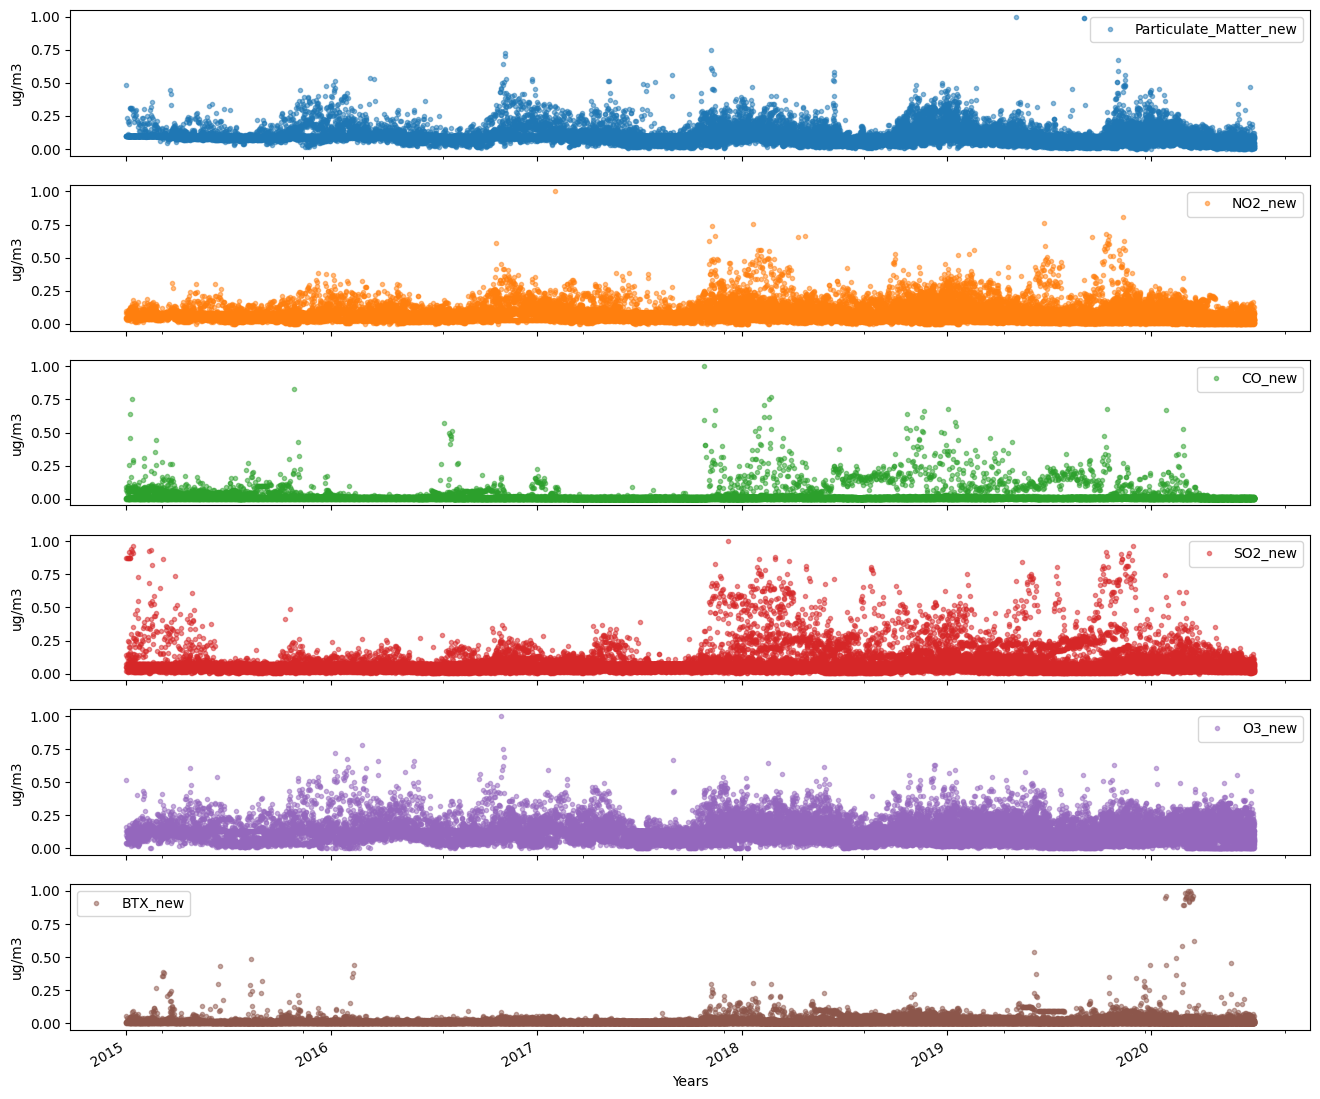

In [15]:
def visualisepollutants(udata, column):
    data = udata.copy()
    data.set_index('Date',inplace=True)
            
    axes = data[column].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 15), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('ug/m3')
visualisepollutants(nCityData, pollutant)

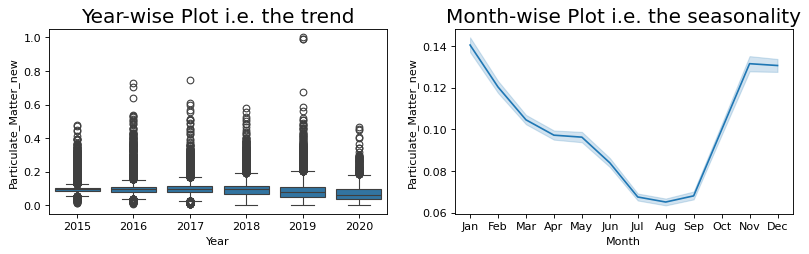

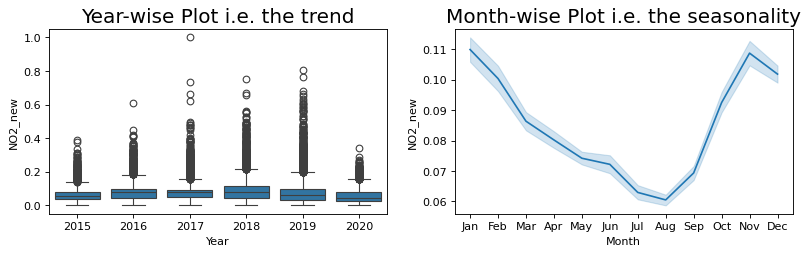

In [16]:
def trend_plot(nCityData, value):
    data = nCityData.copy()
    data['Year'] = [d.year for d in data.Date]
    data['Month'] = [d.strftime('%b') for d in data.Date]
    years = data['Year'].unique()
    fig, axes = plt.subplots(1, 2, figsize=(12,3), dpi= 80)
    sns.boxplot(x='Year', y=value, data=data, ax=axes[0])
    sns.lineplot(x='Month', y=value, data=data.loc[~data.Year.isin([2015, 2020]), :])
    
    axes[0].set_title('Year-wise Plot i.e. the trend', fontsize=18); 
    axes[1].set_title('Month-wise Plot i.e. the seasonality', fontsize=18)
    plt.show()
value='Particulate_Matter_new'
trend_plot(nCityData,value)
value='NO2_new'
trend_plot(nCityData,value)

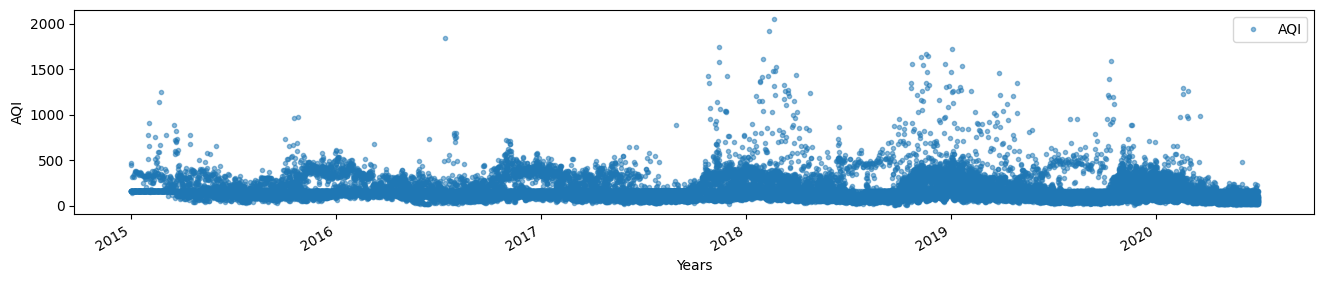

In [17]:
def visualiseAQI(udata, column):
    data = udata.copy()
    data.set_index('Date',inplace=True)
            
    axes = data[column].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 3), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('AQI')
visualiseAQI(nCityData, ['AQI'])

In [18]:
from pandas import DataFrame
from pandas import concat

In [19]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [20]:
newCityData = pd.read_csv('newCityData.csv', header=0, index_col=0)
values = newCityData.values

In [21]:
values[:]

array([['Ahmedabad', '2015-01-01', 166.4635814889336, ...,
        0.1425328862522568, 0.5174220083811889, 2.191132179981615e-05],
       ['Ahmedabad', '2015-01-02', 166.4635814889336, ...,
        0.1265927263347949, 0.1321201303740493, 0.0141875808653809],
       ['Ahmedabad', '2015-01-03', 166.4635814889336, ...,
        0.1499097240134124, 0.1190827254384603, 0.027882156990266],
       ...,
       ['Visakhapatnam', '2020-06-29', 68.0, ..., 0.0433840598400825,
        0.1200915722489523, 2.191132179981615e-05],
       ['Visakhapatnam', '2020-06-30', 54.0, ..., 0.050709311323188,
        0.109770293341611, 0.0],
       ['Visakhapatnam', '2020-07-01', 50.0, ..., 0.010781532112458,
        0.0661182678876299, 0.0164903952804937]], dtype=object)

In [22]:
cities = ['Mumbai','Shillong','Lucknow','Delhi','Visakhapatnam','Patna','Bhopal']
somecityday = newCityData[newCityData['Date'] >= '2015-01-01']
AQI = somecityday[somecityday.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]

In [23]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')

Text(0, 0.5, 'AQI')

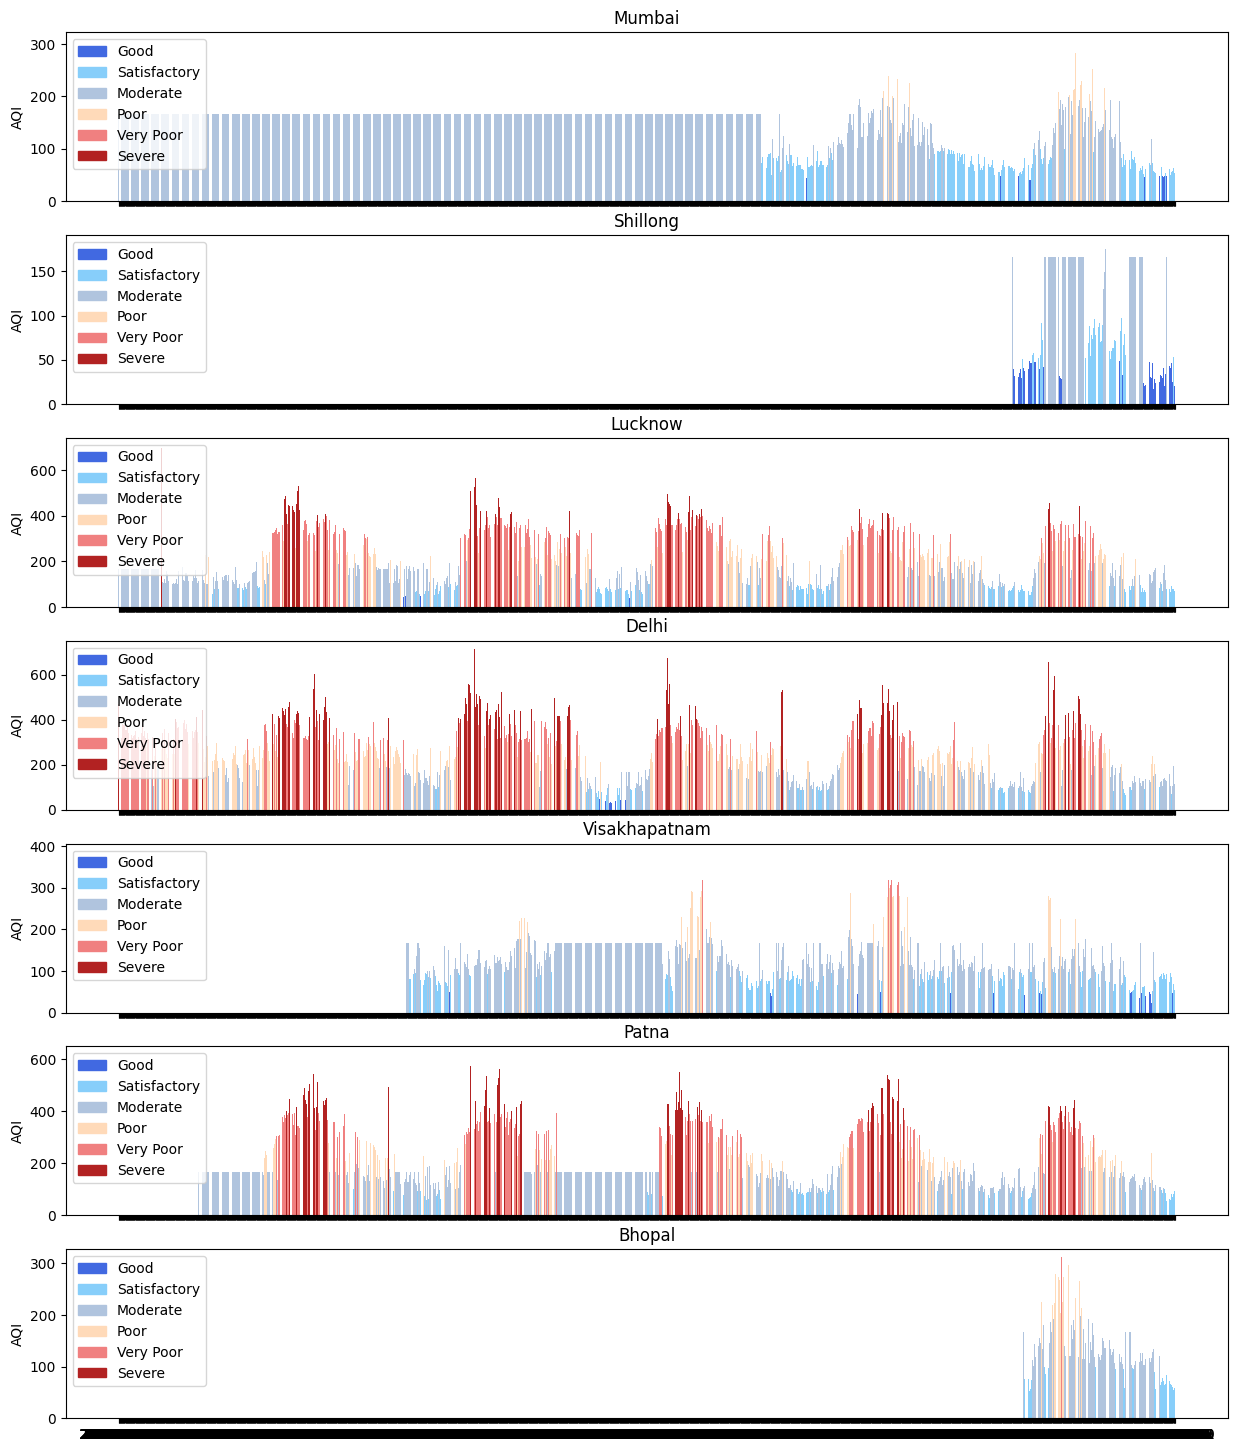

In [24]:
def getColorBar(city):
    col = []
    for val in AQI_pivot[city]:
        if val < 50:
            col.append('royalblue')
        elif val > 50 and val < 101:
            col.append('lightskyblue') #cornflowerblue
        elif val > 100 and val < 201:
            col.append('lightsteelblue')
        elif val > 200 and val < 301:
            col.append('peachpuff')
        elif val > 300 and val < 401:
            col.append('lightcoral')
        elif val> 400:
            col.append('firebrick')
        else:
            col.append('white')
    return col


ah = getColorBar('Mumbai')
de = getColorBar('Shillong')
mu = getColorBar('Lucknow')
ko = getColorBar('Delhi')
hy = getColorBar('Visakhapatnam')
ch = getColorBar('Patna')
bp=getColorBar('Bhopal')


colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Poor':'peachpuff', 'Very Poor':'lightcoral', 'Severe':'firebrick'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        
f, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7)) = plt.subplots(7, 1, sharex='col', sharey='row', figsize=(15,18))
ax1.bar(AQI_pivot.index, AQI_pivot['Mumbai'], color = ah, width = 0.75)
ax2.bar(AQI_pivot.index, AQI_pivot['Shillong'], color = de, width = 0.75)
ax3.bar(AQI_pivot.index, AQI_pivot['Lucknow'], color = mu, width = 0.75)
ax4.bar(AQI_pivot.index, AQI_pivot['Delhi'], color = ko, width = 0.75)
ax5.bar(AQI_pivot.index, AQI_pivot['Visakhapatnam'], color = hy, width = 0.75)
ax6.bar(AQI_pivot.index, AQI_pivot['Patna'], color = ch, width = 0.75)
ax7.bar(AQI_pivot.index, AQI_pivot['Bhopal'], color = bp, width = 0.75)

ax1.legend(handles, labels, loc='upper left')
ax2.legend(handles, labels, loc='upper left')
ax3.legend(handles, labels, loc='upper left')
ax4.legend(handles, labels, loc='upper left')
ax5.legend(handles, labels, loc='upper left')
ax6.legend(handles, labels, loc='upper left')
ax7.legend(handles, labels, loc='upper left')

ax1.title.set_text('Mumbai')
ax2.title.set_text('Shillong')
ax3.title.set_text('Lucknow')
ax4.title.set_text('Delhi')
ax5.title.set_text('Visakhapatnam')
ax6.title.set_text('Patna')
ax7.title.set_text('Bhopal')


ax1.set_ylabel('AQI')
ax2.set_ylabel('AQI')
ax3.set_ylabel('AQI')
ax4.set_ylabel('AQI')
ax5.set_ylabel('AQI')
ax6.set_ylabel('AQI')
ax7.set_ylabel('AQI')



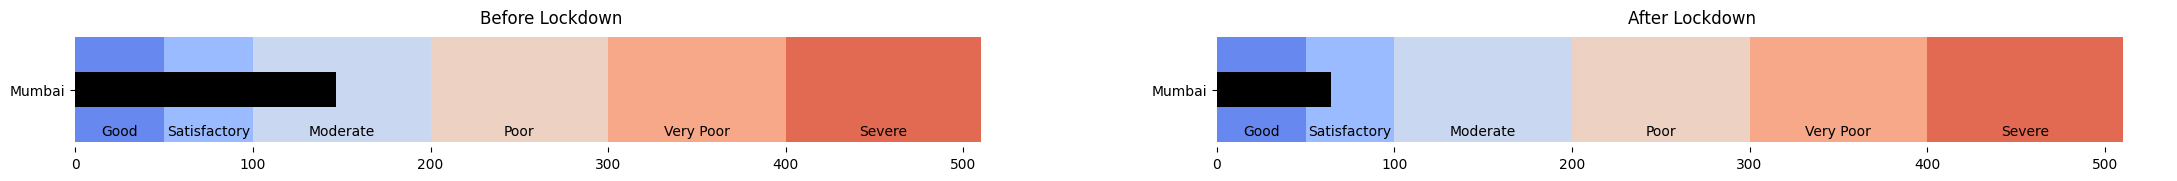

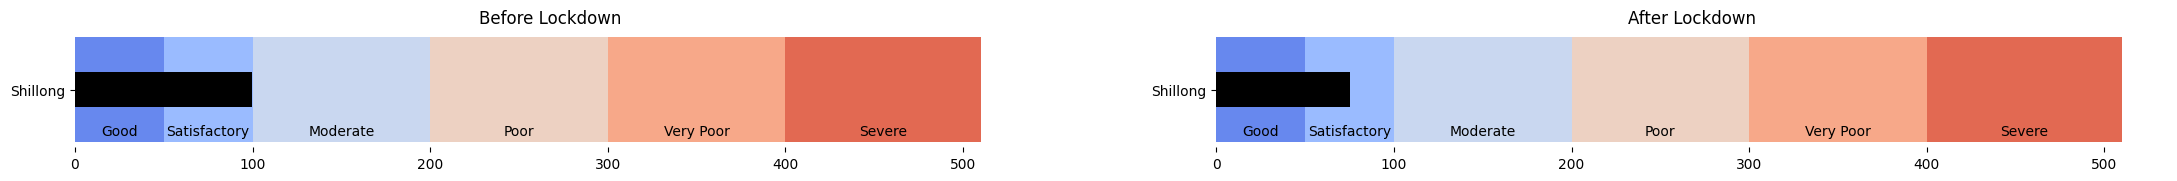

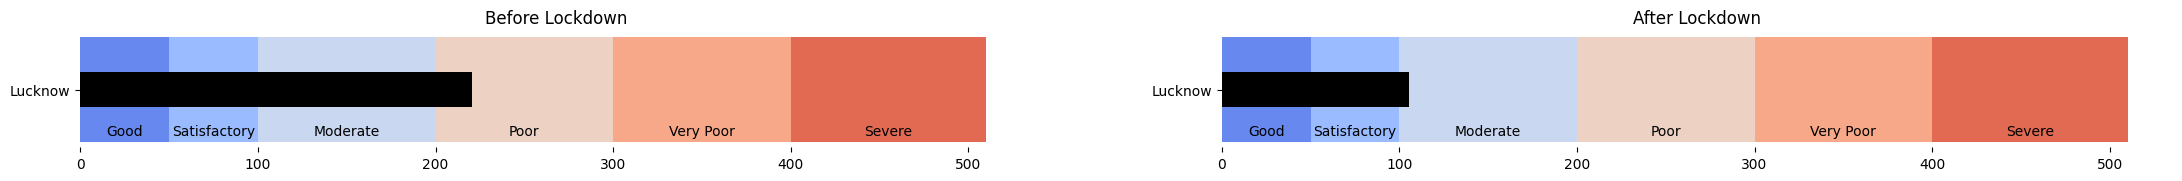

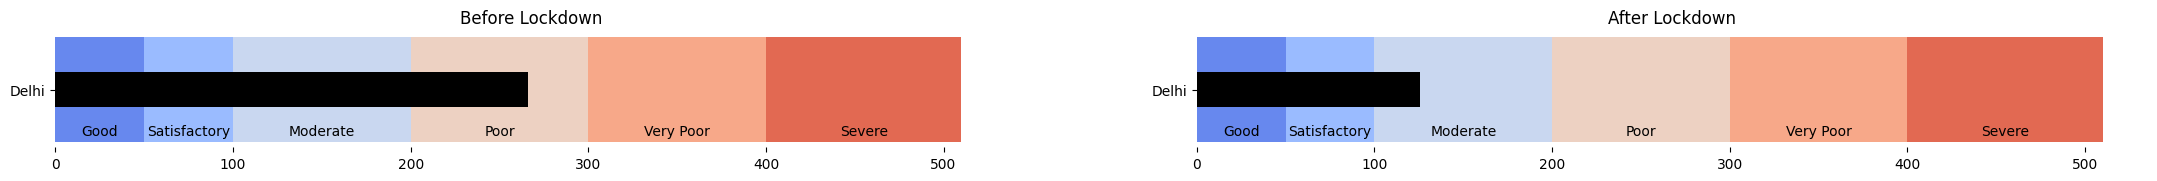

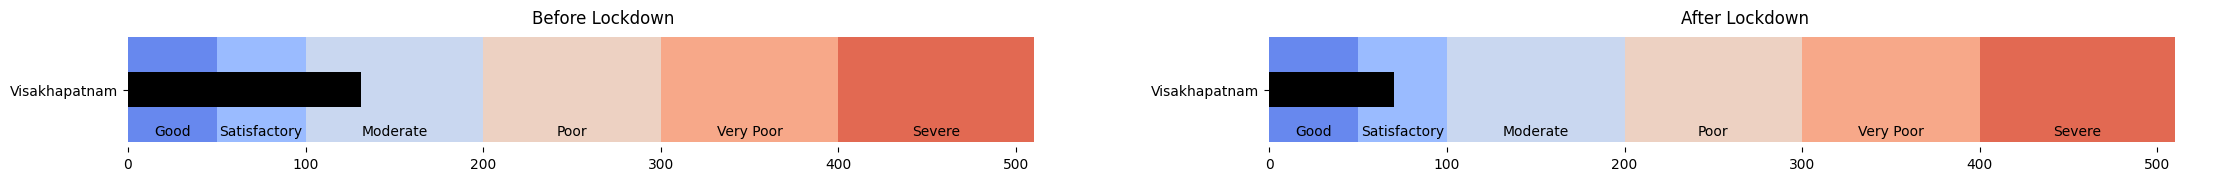

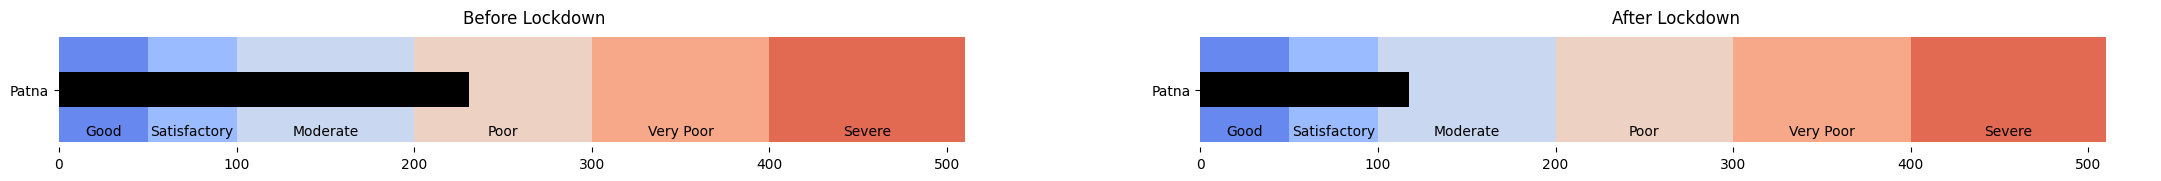

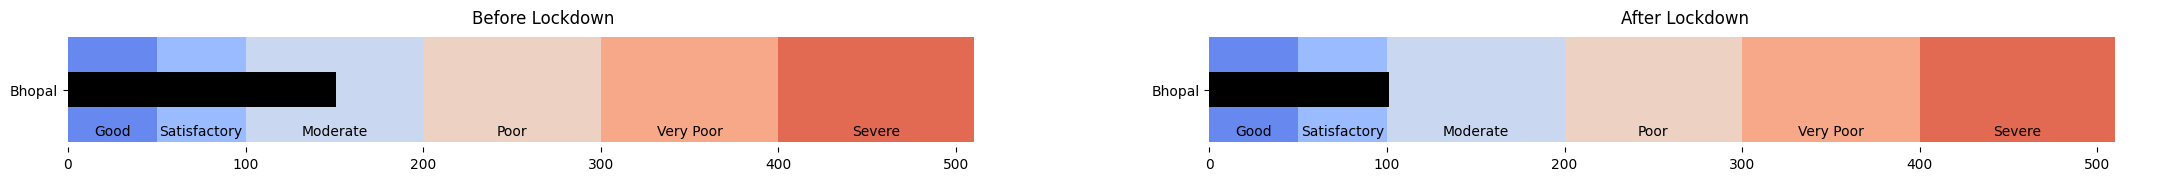

In [25]:
AQI_beforeLockdown = AQI_pivot['2015-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-07-01']
limits = [50, 100, 200, 300, 400, 510]
#palette = sns.light_palette("Spectral", len(limits), reverse = True)
palette = sns.color_palette("coolwarm", len(limits))
for city in cities:
    aqi_before = AQI_beforeLockdown[city].mean()
    aqi_after = AQI_afterLockdown[city].mean()
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(27, 1.5))
    ax1.set_yticks([1])
    ax1.set_yticklabels([city])
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax1.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim

    ax1.barh([1], aqi_before, color='black', height=5)
    
    # after lockdown
    ax2.set_yticks([1])
    ax2.set_yticklabels([city])
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax2.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim

    ax2.barh([1], aqi_after, color='black', height=5)
    
    ax1.set_title('Before Lockdown')
    ax2.set_title('After Lockdown')
    
    rects = ax1.patches
    labels=["Good", "Satisfactory", "Moderate", "Poor", 'Very Poor', 'Severe']
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax1.text(
            rect.get_x() + rect.get_width() / 2,
            -height * .4,
            label,
            ha='center',
            va='bottom',
            color='black')
        ax2.text(
            rect.get_x() + rect.get_width() / 2,
            -height * .4,
            label,
            ha='center',
            va='bottom',
            color='black')

In [26]:
Delhi_data = newCityData[newCityData['City']=='Delhi']
Delhi_data.set_index('Date',inplace=True, drop = False)

In [27]:
Delhi_data

,City,Date,AQI,AQI_Bucket,Particulate_Matter_new,NO2_new,CO_new,SO2_new,O3_new,BTX_new
Date,,,,,,,,,,
2015-01-01,Delhi,2015-01-01,472.0,Severe,0.480248,0.100442,0.086457,0.047666,0.161687,0.053748
2015-01-02,Delhi,2015-01-02,454.0,Severe,0.237219,0.090723,0.054263,0.034253,0.116250,0.038268
2015-01-03,Delhi,2015-01-03,143.0,Moderate,0.113660,0.083655,0.060349,0.013619,0.076440,0.017671
2015-01-04,Delhi,2015-01-04,319.0,Very Poor,0.204821,0.101877,0.065639,0.023833,0.098363,0.018964
2015-01-05,Delhi,2015-01-05,325.0,Very Poor,0.190228,0.096383,0.052329,0.017127,0.089981,0.013114
...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Delhi,2020-06-27,112.0,Moderate,0.101473,0.059221,0.004949,0.053495,0.073219,0.024223
2020-06-28,Delhi,2020-06-28,196.0,Moderate,0.191502,0.059608,0.005347,0.055146,0.069998,0.031311
2020-06-29,Delhi,2020-06-29,233.0,Poor,0.118829,0.059525,0.005005,0.059685,0.103213,0.029646


In [28]:
val = 'AQI'
date_range = np.arange('2015-01-01', '2020-07-02', dtype='datetime64[D]')
values = np.random.rand(len(date_range)) 
final_data = pd.DataFrame(index=date_range, columns=[val], data=values)

# Assuming Delhi_data has 'Date' as the index
Delhi_data['Date'] = pd.to_datetime(Delhi_data['Date'])
Delhi_data = Delhi_data.set_index('Date')

# Reindex final_data to match Delhi_data's index
final_data = final_data.reindex(Delhi_data.index)

# Assign values
final_data[val] = Delhi_data[val]

print(final_data[val])

final_data=final_data.astype('float64')
final_data[val] = final_data[val].fillna(final_data[val].mean(axis=0))

Date
2015-01-01    472.0
2015-01-02    454.0
2015-01-03    143.0
2015-01-04    319.0
2015-01-05    325.0
              ...  
2020-06-27    112.0
2020-06-28    196.0
2020-06-29    233.0
2020-06-30    114.0
2020-07-01    101.0
Name: AQI, Length: 2009, dtype: float64


In [29]:
seasonal_data = final_data
seasonal_data = seasonal_data.resample(rule='MS').mean()
seasonal_data

,AQI
Date,
2015-01-01,342.290323
2015-02-01,327.928571
2015-03-01,256.064516
2015-04-01,305.266667
2015-05-01,348.580645
...,...
2020-03-01,135.838710
2020-04-01,113.000000
2020-05-01,148.645161


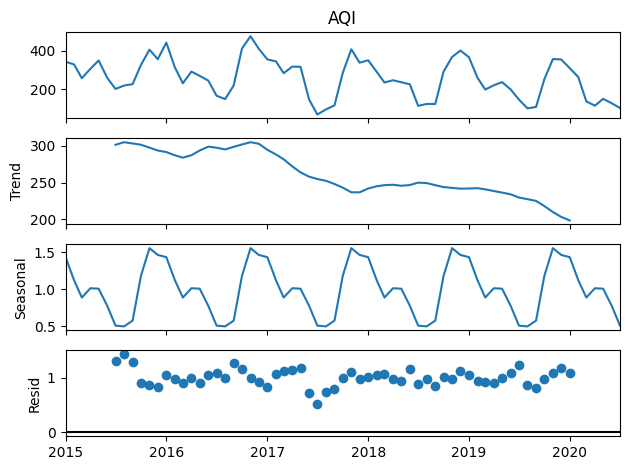

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
Delhi_AQI = seasonal_data[val]
result = seasonal_decompose(Delhi_AQI, model='multiplicative')
result.plot();

In [37]:
import pmdarima as pm

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima;

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [33]:
auto_arima(y=Delhi_AQI,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12)

NameError: name 'auto_arima' is not defined

In [32]:
train = Delhi_AQI[:41] #from 2015-2018
test = Delhi_AQI[42:54]# july 2018-june 2019

In [33]:
test

Date
2018-07-01    112.419355
2018-08-01    122.064516
2018-09-01    121.933333
2018-10-01    290.419355
2018-11-01    367.066667
2018-12-01    400.387097
2019-01-01    365.741935
2019-02-01    258.178571
2019-03-01    197.354839
2019-04-01    219.400000
2019-05-01    235.838710
2019-06-01    197.766667
Freq: MS, Name: AQI, dtype: float64

In [34]:
model=SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()

NameError: name 'train' is not defined

In [35]:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')

In [ ]:
predictions.plot(legend=True)
test.plot(legend=True,title="Delhi Prediction data");

NameError: name 'predictions' is not defined

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error,mean_poisson_deviance,mean_gamma_deviance
import math
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('Root Mean Squared Error: ', RMSE)
print('Mean AQI:',test.mean())
forecast_errors = [test[i]-predictions[i] for i in range(len(test))]
bias = sum(forecast_errors) * 1.0/len(test)
print('Bias: %f' % bias)
mse = mean_squared_error(test, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predictions - test)/np.abs(test))
print('MAPE: '+str(mape))
r2score=r2_score(test, predictions)
print('r2score: '+str(r2score))
explainedVariance_score=explained_variance_score(test, predictions)
print('explainedVariance_score: '+str(explainedVariance_score))
me=max_error(test, predictions)
print('me: '+str(me))
mpd=mean_poisson_deviance(test, predictions)
print('mpd: '+str(mpd))
mgd=mean_gamma_deviance(test, predictions)
print('mgd: '+str(mgd))

NameError: name 'predictions' is not defined

In [37]:
# Forming the model:
final_model = SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,1,12))
results = final_model.fit()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
Delhi_AQI.plot(legend=True,figsize=(12,8),grid=True,title="Delhi AQI");

NameError: name 'train' is not defined

In [38]:
df_anova = pd.read_csv('newCityData.csv')
df_anova = df_anova[['AQI','City']]

In [39]:
from scipy import stats
Citys = pd.unique(df_anova.City.values)
d_data = {city:df_anova['AQI'][df_anova.City == city] for city in Citys}
 
F, p = stats.f_oneway(d_data['Mumbai'], d_data['Shillong'], d_data['Lucknow'])

print("p-value for significance is: ", p)

if p<0.05:
    print("We reject the null hypothesis")
else:
    print("We accept the null hypothesis")

p-value for significance is:  2.3993548794919526e-203
We reject the null hypothesis


In [40]:
from scipy import stats
Citys = pd.unique(df_anova.City.values)
d_data = {city:df_anova['AQI'][df_anova.City == city] for city in Citys}
 
F, p = stats.f_oneway(d_data['Delhi'], d_data['Visakhapatnam'])

print("p-value for significance is: ", p)

if p<0.05:
    print("We reject the null hypothesis")
else:
    print("We accept the null hypothesis")

p-value for significance is:  2.189526810141999e-282
We reject the null hypothesis


In [41]:
from scipy import stats
Citys = pd.unique(df_anova.City.values)
d_data = {city:df_anova['AQI'][df_anova.City == city] for city in Citys}
 
F, p = stats.f_oneway(d_data['Patna'], d_data['Bhopal'])

print("p-value for significance is: ", p)

if p<0.05:
    print("We reject the null hypothesis")
else:
    print("We accept the null hypothesis")

p-value for significance is:  1.3185248240573501e-39
We reject the null hypothesis
